In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
crisis_1 = pd.read_excel('../data/crisis1.xlsx', skiprows = [0,1])

In [ ]:
crisis_2 = pd.read_excel('../data/crisis2.xlsx',skiprows = [0,1])

In [ ]:
call_volume = pd.read_csv('../data/call_volume.csv')

In [ ]:
crisis_1.head()

In [ ]:
crisis_2.head()

In [ ]:
call_volume.head()

In [ ]:
crisis_1.describe()

In [ ]:
crisis_2.describe()

In [ ]:
crisis_1.info()

In [ ]:
crisis_2.info()

In [ ]:
call_volume.info()

In [ ]:
crisis_1.value_counts()

In [ ]:
crisis_1.dropna(how='all', axis=1, inplace=True)

In [ ]:
crisis_2.dropna(how='all', axis=1, inplace=True)

In [ ]:
crisis_1.isnull().sum()

In [ ]:
crisis_2.isnull().sum()

In [ ]:
crisis_1.name.nunique()

In [ ]:
#Reading in call_volume how Abi did it so we can work together on this part

# 2020 DataFrames

In [29]:
stats_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=10, nrows=9, usecols='A:B')
stats_2020.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
#stats_2020['Total'].sub(' calls', '') this didn't work the way I wanted it to, commenting it out until I figure out how to fix it
stats_2020

,Category,Total
0,Number of Received Calls,45772 calls
1,Number of Answered Calls,28483 calls
2,Number of Abandoned Unanswered Call,9484 calls
3,Number of Other Unanswered Calls,6829 calls
4,Number of Transferred Calls,976 calls
5,Unanswered Rate,0.1492
6,Abandon Rate,0.2072
7,Agent Login,33332
8,Agent Logoff,33313


In [30]:
queue_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=23, nrows=12, usecols='A:I')
queue_dist_2020

,Queue,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait
0,AWARE,11,8,3,0,0.7273,0.2727,00:02:04,00:01:44
1,Crisis Eng,22704,15281,7264,159,0.6681,0.3143,00:10:54,00:01:34
2,Crisis Eng PRIORITY,3200,2070,1056,74,0.6700,0.3300,00:10:32,00:01:59
3,Crisis Spanish,153,107,39,7,0.7355,0.2516,00:08:30,00:02:11
4,Crisis Spanish PRIORITY,16,13,2,1,0.8750,0.1250,00:07:50,00:01:58
5,Lifeline,6132,3542,2493,97,0.5934,0.4066,00:11:34,00:00:33
6,MHART,120,75,45,0,0.5474,0.3285,00:07:18,00:00:23
7,Pet Loss,0,0,0,0,0.0000,0.0000,00:00:00,00:00:00
8,REDLINE,11708,6422,4752,534,0.5941,0.4059,00:05:42,00:00:29
9,Referral Line,1358,888,366,104,0.7305,0.2695,00:03:32,00:00:24


In [31]:
month_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=39, nrows=12, usecols='A:K')
month_dist_2020

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2020-01,2880,1795,1033,52,0.6413,0.3587,00:08:58,00:01:15,3160,3160
1,2020-02 (2020-02),2704,1698,936,70,0.6538,0.3462,00:10:08,00:01:03,3462,3450
2,2020-03 (2020-03),4059,2537,1347,175,0.6681,0.3319,00:08:05,00:00:54,3223,3217
3,2020-04 (2020-04),3385,2152,1147,86,0.6612,0.3388,00:09:23,00:01:04,2758,2750
4,2020-05 (2020-05),3721,2239,1388,94,0.6270,0.3730,00:10:32,00:01:18,2369,2377
5,2020-06 (2020-06),3693,2221,1413,59,0.6174,0.3826,00:10:18,00:01:10,2415,2415
6,2020-07 (2020-07),3919,2543,1296,80,0.6693,0.3307,00:10:04,00:00:58,2678,2671
7,2020-08 (2020-08),4390,2527,1803,60,0.5893,0.4107,00:10:15,00:01:23,2465,2479
8,2020-09 (2020-09),3967,2442,1464,61,0.6310,0.3690,00:10:19,00:01:16,3087,3070
9,2020-10 (2020-10),4143,2617,1480,46,0.6428,0.3572,00:09:30,00:01:19,2887,2889


In [32]:
day_dist_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=55, nrows=7, usecols='A:K')
day_dist_2020

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,6864,3576,3174,114,0.5376,0.4624,00:10:17,00:01:28,3641,3624
1,Monday,6811,4472,2187,152,0.6789,0.3211,00:08:38,00:00:59,5549,5576
2,Tuesday,6289,4138,2046,105,0.6747,0.3253,00:09:34,00:01:06,5544,5620
3,Wednesday,6608,4463,1981,164,0.7002,0.2998,00:09:13,00:00:58,5538,5696
4,Thursday,6370,4212,2003,155,0.6856,0.3144,00:09:34,00:00:59,4696,4779
5,Friday,6119,3939,2032,148,0.6679,0.3321,00:09:15,00:01:06,4646,4383
6,Saturday,6711,3683,2890,138,0.5694,0.4306,00:09:54,00:01:25,3718,3635


In [33]:
queue_answered_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=66, nrows=10, usecols='A:C')
queue_answered_2020

,Queue,Count,%
0,AWARE,8 calls,0.0003
1,Crisis Eng,15281 calls,0.5365
2,Crisis Eng PRIORITY,2070 calls,0.0727
3,Crisis Spanish,107 calls,0.0038
4,Crisis Spanish PRIORITY,13 calls,0.0005
5,Lifeline,3542 calls,0.1244
6,MHART,75 calls,0.0026
7,REDLINE,6422 calls,0.2255
8,Referral Line,888 calls,0.0312
9,SAMHSA,77 calls,0.0027


In [34]:
service_speed_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=80, nrows=10, usecols='A:D')
service_speed_2020

,Answer,Count,Delta,%
0,Within 15 secs,21405 calls,21405,0.7266
1,Within 30 secs,25052 calls,3647,0.8504
2,Within 45 secs,26068 calls,1016,0.8849
3,Within 60 secs,26734 calls,666,0.9075
4,Within 75 secs,27090 calls,356,0.9196
5,Within 90 secs,27310 calls,220,0.9271
6,Within 105 secs,27492 calls,182,0.9332
7,Within 120 secs,27677 calls,185,0.9395
8,Within 135 secs,27722 calls,45,0.9410
9,Within 150+ secs,29459 calls,1737,1.0000


In [35]:
abandon_rate_2020 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2020', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2020

,Unanswer,Count,Delta,%
0,Within 15 secs,432 calls,432,0.0265
1,Within 30 secs,2012 calls,1580,0.1233
2,Within 45 secs,3656 calls,1644,0.2241
3,Within 60 secs,8659 calls,5003,0.5308
4,Within 75 secs,11113 calls,2454,0.6812
5,Within 90 secs,11637 calls,524,0.7134
6,Within 105 secs,12062 calls,425,0.7394
7,Within 120 secs,12403 calls,341,0.7603
8,Within 135 secs,12981 calls,578,0.7957
9,Within 150+ secs,16313 calls,3332,1.0000


# 2021 DataFrames

In [36]:
stats_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=10, nrows=9, usecols='A:B')
stats_2021.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2021

,Category,Total
0,Number of Received Calls,53975 calls
1,Number of Answered Calls,37036 calls
2,Number of Abandoned Unanswered Call,10841 calls
3,Number of Other Unanswered Calls,5215 calls
4,Number of Transferred Calls,883 calls
5,Unanswered Rate,0.0966
6,Abandon Rate,0.2009
7,Agent Login,37571
8,Agent Logoff,37534


In [37]:
queue_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=23, nrows=11, usecols='A:I')
queue_dist_2021

,Queue,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait
0,Community Response,35,21,13,1,0.6111,0.3611,00:04:21,00:00:32
1,Crisis Eng,28017,20723,7152,142,0.7390,0.2533,00:11:20,00:01:25
2,Crisis Eng PRIORITY,4254,2864,1331,59,0.6871,0.3129,00:07:01,00:01:17
3,Crisis Spanish,248,213,28,7,0.8765,0.1116,00:07:23,00:00:55
4,Crisis Spanish PRIORITY,36,27,8,1,0.7778,0.2222,00:10:14,00:01:02
5,Lifeline,6223,4021,2009,193,0.6772,0.3228,00:11:25,00:01:00
6,MHART,497,328,165,4,0.6680,0.3320,00:07:06,00:00:24
7,REDLINE,13516,8068,4977,471,0.6318,0.3682,00:04:28,00:00:27
8,Referral Line,951,728,218,5,0.7708,0.2292,00:03:50,00:00:23
9,SAMHSA,198,43,155,0,0.2172,0.7828,00:10:48,00:00:14


In [38]:
month_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=38, nrows=12, usecols='A:K')
month_dist_2021

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2021-01,4743,3094,1556,93,0.6719,0.3281,00:08:25,00:01:02,2485,2469
1,2021-02 (2021-02),4627,3103,1458,66,0.6849,0.3151,00:08:05,00:01:02,2853,2850
2,2021-03 (2021-03),4700,3305,1322,73,0.7187,0.2813,00:08:59,00:01:08,3420,3414
3,2021-04 (2021-04),4450,3175,1236,39,0.7222,0.2778,00:08:41,00:01:04,3103,3091
4,2021-05 (2021-05),4472,2996,1390,86,0.6892,0.3108,00:09:17,00:01:08,2680,2680
5,2021-06 (2021-06),4349,3065,1198,86,0.7245,0.2755,00:09:11,00:01:09,3258,3249
6,2021-07 (2021-07),4591,3029,1475,87,0.6787,0.3213,00:09:18,00:01:15,2751,2778
7,2021-08 (2021-08),4314,3028,1200,86,0.7218,0.2782,00:09:40,00:01:04,2939,2921
8,2021-09 (2021-09),4667,3296,1304,67,0.7206,0.2794,00:09:05,00:01:00,3431,3439
9,2021-10 (2021-10),4293,2878,1360,55,0.6832,0.3168,00:10:12,00:01:10,3250,3259


In [39]:
hour_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=54, nrows=24, usecols='A:K')
hour_dist_2021

,Hour,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,00:00 - 00:59,1709,1020,670,19,0.6080,0.3920,00:09:27,00:01:40,226,253
1,01:00 - 01:59,1409,832,570,7,0.5955,0.4045,00:09:29,00:01:40,424,471
2,02:00 - 02:59,1139,592,533,14,0.5320,0.4680,00:09:24,00:01:52,409,1574
3,03:00 - 03:59,943,544,385,14,0.5917,0.4083,00:11:00,00:01:49,125,179
4,04:00 - 04:59,853,509,334,10,0.6084,0.3916,00:09:52,00:02:02,160,179
5,05:00 - 05:59,1059,697,357,5,0.6629,0.3371,00:09:47,00:01:33,1897,283
6,06:00 - 06:59,1346,1043,288,15,0.7860,0.2140,00:08:49,00:00:45,2922,4539
7,07:00 - 07:59,1586,1156,407,23,0.7434,0.2566,00:09:21,00:00:54,1462,807
8,08:00 - 08:59,2123,1494,572,57,0.7306,0.2694,00:10:26,00:00:49,1327,1202
9,09:00 - 09:59,2136,1586,496,54,0.7678,0.2322,00:09:02,00:00:45,1567,1464


In [40]:
day_dist_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=82, nrows=7, usecols='A:K')
day_dist_2021

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,7729,4656,3003,70,0.6115,0.3885,00:10:09,00:01:25,4966,4747
1,Monday,7866,5817,1919,130,0.7560,0.2440,00:08:49,00:00:52,5873,5913
2,Tuesday,7763,5621,2013,129,0.7407,0.2593,00:09:12,00:01:00,5803,5704
3,Wednesday,7576,5746,1679,151,0.7784,0.2216,00:08:51,00:00:52,5978,5816
4,Thursday,7599,5735,1688,176,0.7779,0.2221,00:08:41,00:00:51,6189,6234
5,Friday,7567,5206,2229,132,0.7054,0.2946,00:09:05,00:01:02,5111,5433
6,Saturday,7875,4255,3525,95,0.5524,0.4476,00:10:31,00:01:33,3651,3687


In [41]:
service_speed_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=93, nrows=10, usecols='A:D')
service_speed_2021

,Answer,Count,Delta,%
0,Within 15 secs,27645 calls,27645,0.7291
1,Within 30 secs,32077 calls,4432,0.8459
2,Within 45 secs,33423 calls,1346,0.8814
3,Within 60 secs,34160 calls,737,0.9009
4,Within 75 secs,34615 calls,455,0.9129
5,Within 90 secs,34985 calls,370,0.9226
6,Within 105 secs,35301 calls,316,0.9310
7,Within 120 secs,35550 calls,249,0.9375
8,Within 135 secs,35676 calls,126,0.9408
9,Within 150+ secs,37919 calls,2243,1.0000


In [42]:
abandon_rate_2021 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2021', skiprows=107, nrows=10, usecols='A:D')
abandon_rate_2021

,Unanswer,Count,Delta,%
0,Within 15 secs,239 calls,239,0.0149
1,Within 30 secs,1708 calls,1469,0.1064
2,Within 45 secs,3549 calls,1841,0.2210
3,Within 60 secs,7591 calls,4042,0.4728
4,Within 75 secs,9167 calls,1576,0.5709
5,Within 90 secs,9823 calls,656,0.6118
6,Within 105 secs,10303 calls,480,0.6417
7,Within 120 secs,10741 calls,438,0.6690
8,Within 135 secs,11422 calls,681,0.7114
9,Within 150+ secs,16056 calls,4634,1.0000


# 2022 DataFrames (through April)

In [43]:
stats_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=7, nrows=9, usecols='A:B')
stats_2022.rename(inplace=True, columns={'Total Calls':'Category', 'Unnamed: 1':'Total'})
stats_2022

,Category,Total
0,Number of Received Calls,17265 calls
1,Number of Answered Calls,13201 calls
2,Number of Abandoned Unanswered Call,2749 calls
3,Number of Other Unanswered Calls,1097 calls
4,Number of Transferred Calls,218 calls
5,Unanswered Rate,0.0635
6,Abandon Rate,0.1592
7,Agent Login,14498
8,Agent Logoff,14514


In [44]:
queue_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=18, nrows=10, usecols='A:I')
queue_dist_2022

,Queue,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait
0,Community Response,2,2,0,0,100.00,0.00,00:06:19,00:00:10
1,Crisis Eng,10356,8273,2049,34,79.81,19.69,00:11:10,00:01:02
2,Crisis Eng PRIORITY,907,677,213,17,76.52,23.48,00:09:05,00:01:11
3,Crisis Spanish,65,49,15,1,76.92,23.08,00:07:19,00:00:59
4,Crisis Spanish PRIORITY,13,8,5,0,61.54,38.46,00:07:49,00:01:10
5,Lifeline,1851,1353,447,51,75.85,24.15,00:11:44,00:00:48
6,MHART,7,7,0,0,100.00,0.00,00:00:38,00:00:10
7,REDLINE,3651,2491,1052,108,71.19,28.81,00:04:45,00:00:23
8,Referral Line,410,341,62,7,84.88,15.12,00:04:42,00:00:18
9,SAMHSA,3,0,3,0,0.00,100.00,00:00:00,00:00:15


In [45]:
month_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=32, nrows=4, usecols='A:K')
month_dist_2022

,Month,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,2022-01,5090,3696,1329,65,0.7389,0.2611,00:09:38,00:00:58,3408,3426
1,2022-02 (2022-02),4127,3236,840,51,0.7965,0.2035,00:09:12,00:00:49,3568,3559
2,2022-03 (2022-03),4034,3080,898,56,0.7774,0.2226,00:10:07,00:00:53,3688,3704
3,2022-04,4014,3189,779,46,0.8059,0.1941,00:09:49,00:00:46,3834,3825


In [46]:
hour_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=40, nrows=24, usecols='A:K')
hour_dist_2022

,Hour,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,00:00 - 00:59,561,416,140,5,0.7504,0.2496,00:10:28,00:01:24,78,109
1,01:00 - 01:59,468,350,116,2,0.7521,0.2479,00:10:11,00:01:12,124,412
2,02:00 - 02:59,414,290,120,4,0.7101,0.2899,00:09:46,00:01:04,77,394
3,03:00 - 03:59,327,225,98,4,0.7003,0.2997,00:09:25,00:01:14,26,51
4,04:00 - 04:59,328,254,69,5,0.7896,0.2104,00:08:40,00:00:54,18,34
5,05:00 - 05:59,370,261,103,6,0.7216,0.2784,00:09:21,00:01:03,527,115
6,06:00 - 06:59,473,414,50,9,0.8943,0.1057,00:09:03,00:00:30,1216,1716
7,07:00 - 07:59,507,428,77,2,0.8481,0.1519,00:09:13,00:00:29,492,198
8,08:00 - 08:59,611,509,95,7,0.8445,0.1555,00:10:20,00:00:37,636,420
9,09:00 - 09:59,669,557,97,15,0.8550,0.1450,00:08:43,00:00:36,457,504


In [47]:
day_dist_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=68, nrows=7, usecols='A:K')
day_dist_2022

,Day,Received,Answered,Unanswered,Transfers,% Answ,% Unansw,Avg Durat.,Avg Wait,Logins,Logoff
0,Sunday,2680,1780,884,16,0.6701,0.3299,00:10:16,00:01:09,1615,1490
1,Monday,2766,2131,587,48,0.7878,0.2122,00:09:03,00:00:45,2290,2215
2,Tuesday,2515,2043,444,28,0.8235,0.1765,00:08:55,00:00:42,2054,2016
3,Wednesday,2334,1894,406,34,0.8260,0.1740,00:09:59,00:00:44,2501,2470
4,Thursday,2179,1823,317,39,0.8545,0.1455,00:09:25,00:00:40,2368,2378
5,Friday,2371,1884,451,36,0.8098,0.1902,00:09:15,00:00:45,2026,2151
6,Saturday,2420,1646,757,17,0.6872,0.3128,00:11:18,00:01:15,1644,1794


In [48]:
service_speed_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=80, nrows=10, usecols='A:D')
service_speed_2022

,Answer,Count,Delta,%
0,Within 15 secs,10235 calls,10235,0.7627
1,Within 30 secs,11684 calls,1449,0.8707
2,Within 45 secs,12079 calls,395,0.9001
3,Within 60 secs,12290 calls,211,0.9159
4,Within 75 secs,12456 calls,166,0.9282
5,Within 90 secs,12572 calls,116,0.9369
6,Within 105 secs,12667 calls,95,0.9440
7,Within 120 secs,12749 calls,82,0.9501
8,Within 135 secs,12781 calls,32,0.9525
9,Within 150+ secs,13419 calls,638,1.0000


In [49]:
abandon_rate_2022 = pd.read_excel('../data/call_volume.xlsx', sheet_name='2022', skiprows=94, nrows=10, usecols='A:D')
abandon_rate_2022

,Unanswer,Count,Delta,%
0,Within 15 secs,15 calls,15,0.0039
1,Within 30 secs,402 calls,387,0.1045
2,Within 45 secs,859 calls,457,0.2233
3,Within 60 secs,1929 calls,1070,0.5016
4,Within 75 secs,2154 calls,225,0.5601
5,Within 90 secs,2340 calls,186,0.6084
6,Within 105 secs,2487 calls,147,0.6466
7,Within 120 secs,2596 calls,109,0.6750
8,Within 135 secs,2767 calls,171,0.7194
9,Within 150+ secs,3846 calls,1079,1.0000


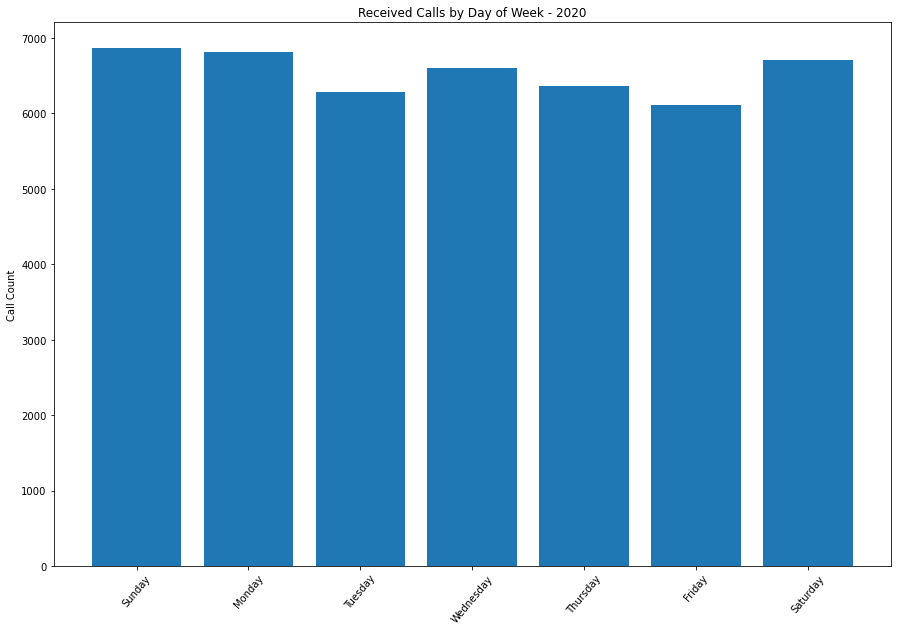

In [50]:
#day_dist_2020.hist(column='Received', by='Day') -- wanted a histogram but I think I need to just do a bar plot
plt.figure(figsize=(15,10))
plt.bar(day_dist_2020['Day'], day_dist_2020['Received'])
plt.title('Received Calls by Day of Week - 2020')
plt.ylabel('Call Count')
plt.xticks(rotation=50)
plt.show()

Text(0, 0.5, 'Calls')

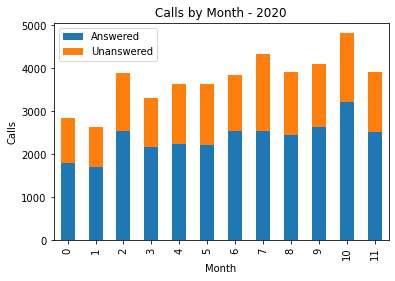

In [67]:
month_dist_2020[['Answered','Unanswered']].plot(kind='bar', stacked=True)
plt.title("Calls by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls")

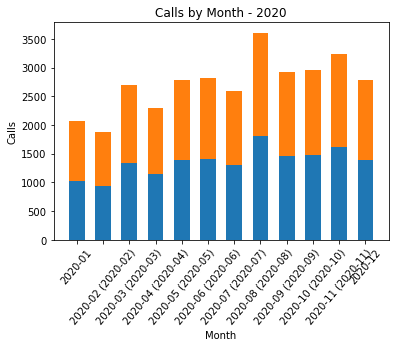

In [72]:
w = 0.6

# Plot stacked bar chart

plt.bar(month_dist_2020['Month'], month_dist_2020['Answered'], w)
plt.bar(month_dist_2020['Month'], month_dist_2020['Unanswered'], w, bottom= month_dist_2020['Unanswered'])
plt.title("Calls by Month - 2020")
plt.xlabel("Month")
plt.ylabel("Calls")
# Display
plt.xticks(rotation=50)
plt.show()